<a href="https://colab.research.google.com/github/ohallao/MoneyBall-Brasileirao/blob/main/MoneyBall_Braisleirao_Volantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install soccerdata

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[01/05/25 16:34:14] INFO     No custom team name replacements found. You can configure these in       ]8;id=208705;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=538788;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#90\90]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=169668;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=514642;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#194\194]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2024)
print(fbref.__doc__)

[01/05/25 16:34:16] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=244678;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=512262;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                   Playing Time               \
                                                             MP Starts   Min   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio           20     14  1215   
                                  Alex Santana                4      0   101   
                                  Bento                       7      7   630   
                                  Bruno Praxedes              7      2   237   
                                  Bruno Zapelli              32     16  1412   

                                                         Performance      ...  \
                                                     90s         Gls Ast  ...   
league      season team           player                                  ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5           4   1  ...   
                                  Alex Santana       1.1           0   0  ...   
                                  Bento              7.0           0   0  ...   
                                  Bruno Praxedes     2.6           0   0  ...   
                                  Bruno Zapelli     15.7           0   5  ...   

                                                   Per 90 Minutes              \
                                                              Gls   Ast   G+A   
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio            0.3  0.07  0.37   
                                  Alex Santana                0.0   0.0   0.0   
                                  Bento                       0.0   0.0   0.0   
                                  Bruno Praxedes              0.0   0.0   0.0   
                                  Bruno Zapelli               0.0  0.32  0.32   

                                                                            \
                                                   G-PK G+A-PK    xG   xAG   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.3   0.37  0.26  0.18   
                                  Alex Santana      0.0    0.0  0.06   0.0   
                                  Bento             0.0    0.0   0.0   0.0   
                                  Bruno Praxedes    0.0    0.0  0.03  0.12   
                                  Bruno Zapelli     0.0   0.32  0.24   0.3   

                                                                          
                                                   xG+xAG  npxG npxG+xAG  
league      season team           player                                  
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   0.44  0.26     0.44  
                                  Alex Santana       0.06  0.06     0.06  
                                  Bento               0.0   0.0      0.0  
                                  Bruno Praxedes     0.15  0.03     0.15  
                                  Bruno Zapelli      0.54  0.24     0.54  

[5 rows x 33 columns]

In [6]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born Playing Time         ... Per 90 Minutes                                \
                  MP Starts  ...            Gls   Ast   G+A G-PK G+A-PK    xG   
0  1998           20     14  ...            0.3  0.07  0.37  0.3   0.37  0.26   
1  1995            4      0  ...            0.0   0.0   0.0  0.0    0.0  0.06   
2  1999            7      7  ...            0.0   0.0   0.0  0.0    0.0   0.0   
3  2002            7      2  ...            0.0   0.0   0.0  0.0    0.0  0.03   
4  2002           32     16  ...            0.0  0.32  0.32  0.0   0.32  0.24   

                               
    xAG xG+xAG  npxG npxG+xAG  
0  0.18   0.44  0.26     0.44  
1   0.0   0.06  0.06     0.06  
2   0.0    0.0   0.0      0.0  
3  0.12   0.15  0.03     0.15  
4   0.3   0.54  0.24     0.54  

[5 rows x 37 columns]

In [7]:
player_season_mis = fbref.read_player_season_stats(stat_type="misc")
player_season_mis.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                     90s Performance       \
                                                                CrdY CrdR   
league      season team           player                                    
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5           6    1   
                                  Alex Santana       1.1           2    0   
                                  Bento              7.0           1    0   
                                  Bruno Praxedes     2.6           0    0   
                                  Bruno Zapelli     15.7           3    0   

                                                                  ...          \
                                                   2CrdY Fls Fld  ... Crs Int   
league      season team           player                          ...           
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     1  17  25  ...  36   4   
                                  Alex Santana         0   3   1  ...   0   0   
                                  Bento                0   1   0  ...   0   0   
                                  Bruno Praxedes       0   8   2  ...   7   2   
                                  Bruno Zapelli        0  19  18  ...  93   8   

                                                                              \
                                                   TklW PKwon PKcon OG Recov   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   19     0     0  0    71   
                                  Alex Santana        0     0     0  0     6   
                                  Bento               0     0     1  0     4   
                                  Bruno Praxedes      4     0     0  0    13   
                                  Bruno Zapelli      19     0     0  0    70   

                                                   Aerial Duels              
                                                            Won Lost   Won%  
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio            7    7   50.0  
                                  Alex Santana                2    4   33.3  
                                  Bento                       2    0  100.0  
                                  Bruno Praxedes              3    2   60.0  
                                  Bruno Zapelli               4   17   19.0  

[5 rows x 21 columns]

In [8]:
player_season_mis = player_season_mis.reset_index()
print(player_season_mis.columns)
player_season_mis.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born   90s Performance  ...                                   Aerial Duels  \
                     CrdY  ... Crs Int TklW PKwon PKcon OG Recov          Won   
0  1998  13.5           6  ...  36   4   19     0     0  0    71            7   
1  1995   1.1           2  ...   0   0    0     0     0  0     6            2   
2  1999   7.0           1  ...   0   0    0     0     1  0     4            2   
3  2002   2.6           0  ...   7   2    4     0     0  0    13            3   
4  2002  15.7           3  ...  93   8   19     0     0  0    70            4   

               
  Lost   Won%  
0    7   50.0  
1    4   33.3  
2    0  100.0  
3    2   60.0  
4   17   19.0  

[5 rows x 25 columns]

In [9]:
player_season_def = fbref.read_player_season_stats(stat_type="defense")
player_season_def.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                     90s Tackles               \
                                                             Tkl TklW Def 3rd   
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5      30   19       6   
                                  Alex Santana       1.1       2    0       0   
                                  Bento              7.0       0    0       0   
                                  Bruno Praxedes     2.6       7    4       2   
                                  Bruno Zapelli     15.7      30   19       8   

                                                                    ...  \
                                                   Mid 3rd Att 3rd  ...   
league      season team           player                            ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio      20       4  ...   
                                  Alex Santana           1       1  ...   
                                  Bento                  0       0  ...   
                                  Bruno Praxedes         4       1  ...   
                                  Bruno Zapelli         12      10  ...   

                                                   Challenges             \
                                                          Att  Tkl% Lost   
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio         31  41.9   18   
                                  Alex Santana              5  20.0    4   
                                  Bento                     1   0.0    1   
                                  Bruno Praxedes            5  40.0    3   
                                  Bruno Zapelli            35  37.1   22   

                                                   Blocks         Int Tkl+Int  \
                                                   Blocks Sh Pass               
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     22  0   22   4      34   
                                  Alex Santana          1  0    1   0       2   
                                  Bento                 0  0    0   0       0   
                                  Bruno Praxedes        7  3    4   2       9   
                                  Bruno Zapelli        16  3   13   8      38   

                                                   Clr Err  
                                                            
league      season team           player                    
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   8   0  
                                  Alex Santana       0   0  
                                  Bento              1   0  
                                  Bruno Praxedes     3   0  
                                  Bruno Zapelli     12   0  

[5 rows x 21 columns]

In [10]:
player_season_def = player_season_def.reset_index()
print(player_season_def.columns)
player_season_def.head()

MultiIndex([(    'league',        ''),
            (    'season',        ''),
            (      'team',        ''),
            (    'player',        ''),
            (    'nation',        ''),
            (       'pos',        ''),
            (       'age',        ''),
            (      'born',        ''),
            (       '90s',        ''),
            (   'Tackles',     'Tkl'),
            (   'Tackles',    'TklW'),
            (   'Tackles', 'Def 3rd'),
            (   'Tackles', 'Mid 3rd'),
            (   'Tackles', 'Att 3rd'),
            ('Challenges',     'Tkl'),
            ('Challenges',     'Att'),
            ('Challenges',    'Tkl%'),
            ('Challenges',    'Lost'),
            (    'Blocks',  'Blocks'),
            (    'Blocks',      'Sh'),
            (    'Blocks',    'Pass'),
            (       'Int',        ''),
            (   'Tkl+Int',        ''),
            (       'Clr',        ''),
            (       'Err',        '')],
           )


league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born   90s Tackles  ... Challenges            Blocks         Int Tkl+Int  \
                  Tkl  ...        Att  Tkl% Lost Blocks Sh Pass               
0  1998  13.5      30  ...         31  41.9   18     22  0   22   4      34   
1  1995   1.1       2  ...          5  20.0    4      1  0    1   0       2   
2  1999   7.0       0  ...          1   0.0    1      0  0    0   0       0   
3  2002   2.6       7  ...          5  40.0    3      7  3    4   2       9   
4  2002  15.7      30  ...         35  37.1   22     16  3   13   8      38   

  Clr Err  
           
0   8   0  
1   0   0  
2   1   0  
3   3   0  
4  12   0  

[5 rows x 25 columns]

In [11]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_mis.columns = ['_'.join(col).strip() for col in player_season_mis.columns]
player_season_def.columns = ['_'.join(col).strip() for col in player_season_def.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_mis.columns)
print(player_season_def.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [12]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','age_','Playing Time_Min','Progression_PrgC', 'Progression_PrgP',]
]
df_mis_selected = player_season_mis[
    ['player_', 'team_','Performance_CrdY','Performance_CrdR', 'Performance_2CrdY', 'Performance_Fls','Performance_Int','Performance_Recov','Aerial Duels_Won', 'Aerial Duels_Lost', 'Aerial Duels_Won%']
]
df_def_selected = player_season_def[
    ['player_', 'team_','Tackles_Tkl', 'Tackles_TklW','Clr_', 'Err_',]
]

# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_mis_selected, on=['player_', 'team_'], how='inner')
df_merged= pd.merge(df_merged_1, df_def_selected, on=['player_', 'team_'], how='inner')
# 5. Exibir o resultado
print(df_merged.head())
print(f"Número de linhas: {len(df_merged)}")

            player_           team_   pos_  age_  Playing Time_Min  \
0  Agustín Canobbio  Ath Paranaense  FW,MF    25              1215   
1      Alex Santana  Ath Paranaense  MF,FW    28               101   
2             Bento  Ath Paranaense     GK    24               630   
3    Bruno Praxedes  Ath Paranaense  MF,FW    21               237   
4     Bruno Zapelli  Ath Paranaense  MF,FW    21              1412   

   Progression_PrgC  Progression_PrgP  Performance_CrdY  Performance_CrdR  \
0                47                57                 6                 1   
1                 1                 2                 2                 0   
2                 0                 0                 1                 0   
3                 5                12                 0                 0   
4                37                82                 3                 0   

   Performance_2CrdY  Performance_Fls  Performance_Int  Performance_Recov  \
0                  1               17  

In [13]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Defesas(DF) e Meias (MF)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|DF|FW', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem

print(filtered_data.head())
print(f"Número de linhas: {len(filtered_data)}")

             player_           team_ pos_  age_  Playing Time_Min  \
8        Fernandinho  Ath Paranaense   MF    38              1551   
10         Filipinho  Ath Paranaense   MF    22               923   
11           Gabriel  Ath Paranaense   MF    31              1431   
41  Gabriel Baralhas  Atl Goianiense   MF    25              2452   
43   Gonzalo Freitas  Atl Goianiense   MF    32               820   

    Progression_PrgC  Progression_PrgP  Performance_CrdY  Performance_CrdR  \
8                 39               168                 8                 0   
10                 7                16                 3                 0   
11                17               103                 3                 0   
41                22               121                 9                 0   
43                 2                27                 7                 0   

    Performance_2CrdY  Performance_Fls  Performance_Int  Performance_Recov  \
8                   0               34

In [14]:
# Selecionar as colunas desejadas para análise
Vol = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('age_'),
    ('Playing Time_Min'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Performance_CrdY'),
    ('Performance_CrdR'),
    ('Performance_2CrdY'),
    ('Performance_Fls'),
    ('Performance_Int'),
    ('Performance_Recov'),
    ('Aerial Duels_Won'),
    ('Aerial Duels_Lost'),
    ('Aerial Duels_Won%'),
    ('Tackles_Tkl'),
    ('Tackles_TklW'),
    ('Clr_'),
    ('Err_'),
]]

# Renomear as colunas para facilitar o uso
Vol.columns = ['jogador','time','posicao','idade', 'Minutos','Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros',]

# Exportar o dataframe para um arquivo CSV
Vol.to_csv('Vol_data.csv', index=False, encoding='utf-8-sig')

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Vol.head())

# Remover jogadores com todas as métricas iguais a 0
#Vol = Vol[(Vol[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls','Desarmes Totais','Desarmes%','Interceptacao','Desarmes Certos','Cross',]] != 0).any(axis=1)]



             jogador            time posicao  idade  Minutos  Prgc  PrgP  \
8        Fernandinho  Ath Paranaense      MF     38     1551    39   168   
10         Filipinho  Ath Paranaense      MF     22      923     7    16   
11           Gabriel  Ath Paranaense      MF     31     1431    17   103   
41  Gabriel Baralhas  Atl Goianiense      MF     25     2452    22   121   
43   Gonzalo Freitas  Atl Goianiense      MF     32      820     2    27   

    Amarelo  Vermelho  2 Amarelo  Falta Cometida  interceptacao  recuperacoes  \
8         8         0          0              34             10            99   
10        3         0          0              22             21            43   
11        3         0          0              22             21           101   
41        9         0          0              29             39           130   
43        7         0          0              24             13            31   

    Duelos Aereoes W  Duelos Aereoes L  Duelos Aereoes W

### **2. Criar modelos de classificação para  (Volantes)**

In [16]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Vol[['Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Vol['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Vol[['Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros']])

     Prgc  PrgP  Amarelo  Vermelho  2 Amarelo  Falta Cometida  interceptacao  \
8      39   168        8         0          0              34             10   
10      7    16        3         0          0              22             21   
11     17   103        3         0          0              22             21   
41     22   121        9         0          0              29             39   
43      2    27        7         0          0              24             13   
..    ...   ...      ...       ...        ...             ...            ...   
711     6    41        5         0          0              29             27   
717    13    45        6         0          0              21             17   
718     3    39        2         0          0              10             13   
728     5    54        0         0          0              16             12   
732    11   102        8         0          0              44             31   

     recuperacoes  Duelos Aereoes W  Du

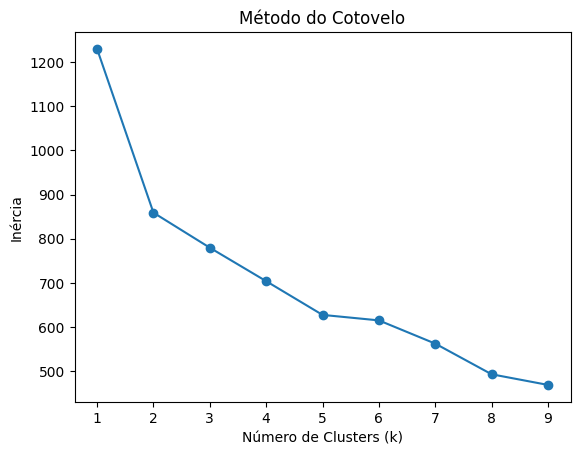

In [17]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [18]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [19]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Vol.groupby('Cluster').agg({col: 'mean' for col in Vol.select_dtypes(include=['number']).columns})
print(cluster_summary)

             idade      Minutos       Prgc        PrgP   Amarelo  Vermelho  \
Cluster                                                                      
0        25.952381       1288.0  10.238095   58.619048  3.714286  0.047619   
1             29.0      2252.75  43.916667       162.5  6.166667  0.333333   
2        25.941176  2229.117647  23.352941  113.588235  6.705882  0.176471   
3            28.75       2134.0      17.75       131.5      9.25       1.0   
4        26.321429  1005.178571  13.642857   57.285714       3.5  0.071429   

         2 Amarelo  Falta Cometida  interceptacao  recuperacoes  \
Cluster                                                           
0              0.0       24.380952      19.619048     69.380952   
1              0.0            34.5      15.833333    118.083333   
2              0.0       44.058824      29.176471    128.352941   
3              1.0            37.0           26.5        125.25   
4              0.0       16.464286      10.928571  

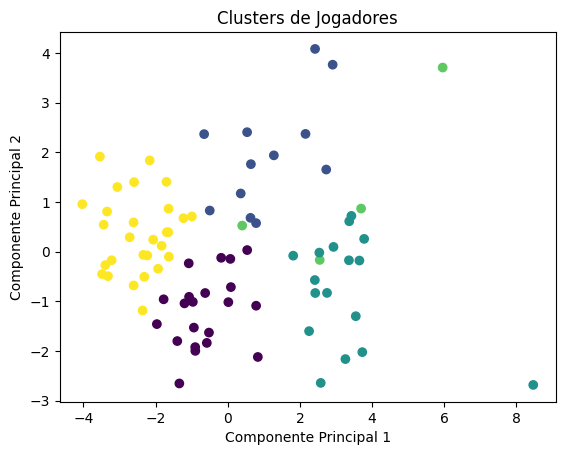

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [21]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = Vol.select_dtypes(include=np.number).columns
correlation_matrix = Vol[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                      idade   Minutos      Prgc      PrgP   Amarelo  Vermelho  \
idade              1.000000  0.086926  0.139910  0.278495  0.069190  0.051893   
Minutos            0.086926  1.000000  0.648165  0.768946  0.539128  0.253907   
Prgc               0.139910  0.648165  1.000000  0.802329  0.202371  0.072607   
PrgP               0.278495  0.768946  0.802329  1.000000  0.419982  0.150912   
Amarelo            0.069190  0.539128  0.202371  0.419982  1.000000  0.294147   
Vermelho           0.051893  0.253907  0.072607  0.150912  0.294147  1.000000   
2 Amarelo          0.121092  0.201049 -0.025262  0.178262  0.365592  0.460956   
Falta Cometida     0.016424  0.691549  0.411670  0.491036  0.569315  0.109570   
interceptacao      0.052350  0.531535  0.108133  0.345972  0.317887  0.078548   
recuperacoes       0.057341  0.867347  0.545578  0.697649  0.578315  0.151370   
Duelos Aereoes W   0.038096  0.469489  0.076427  0.251275  0.327787 -0.011148   
Duelos Aereoes L   0.075794 

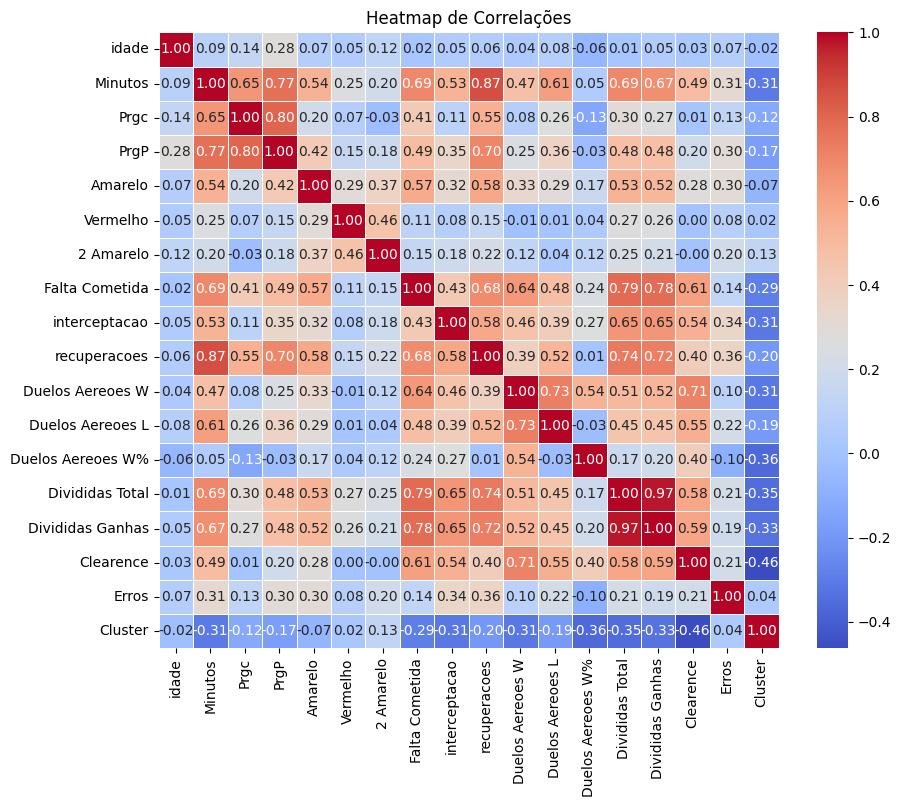

In [22]:
plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()


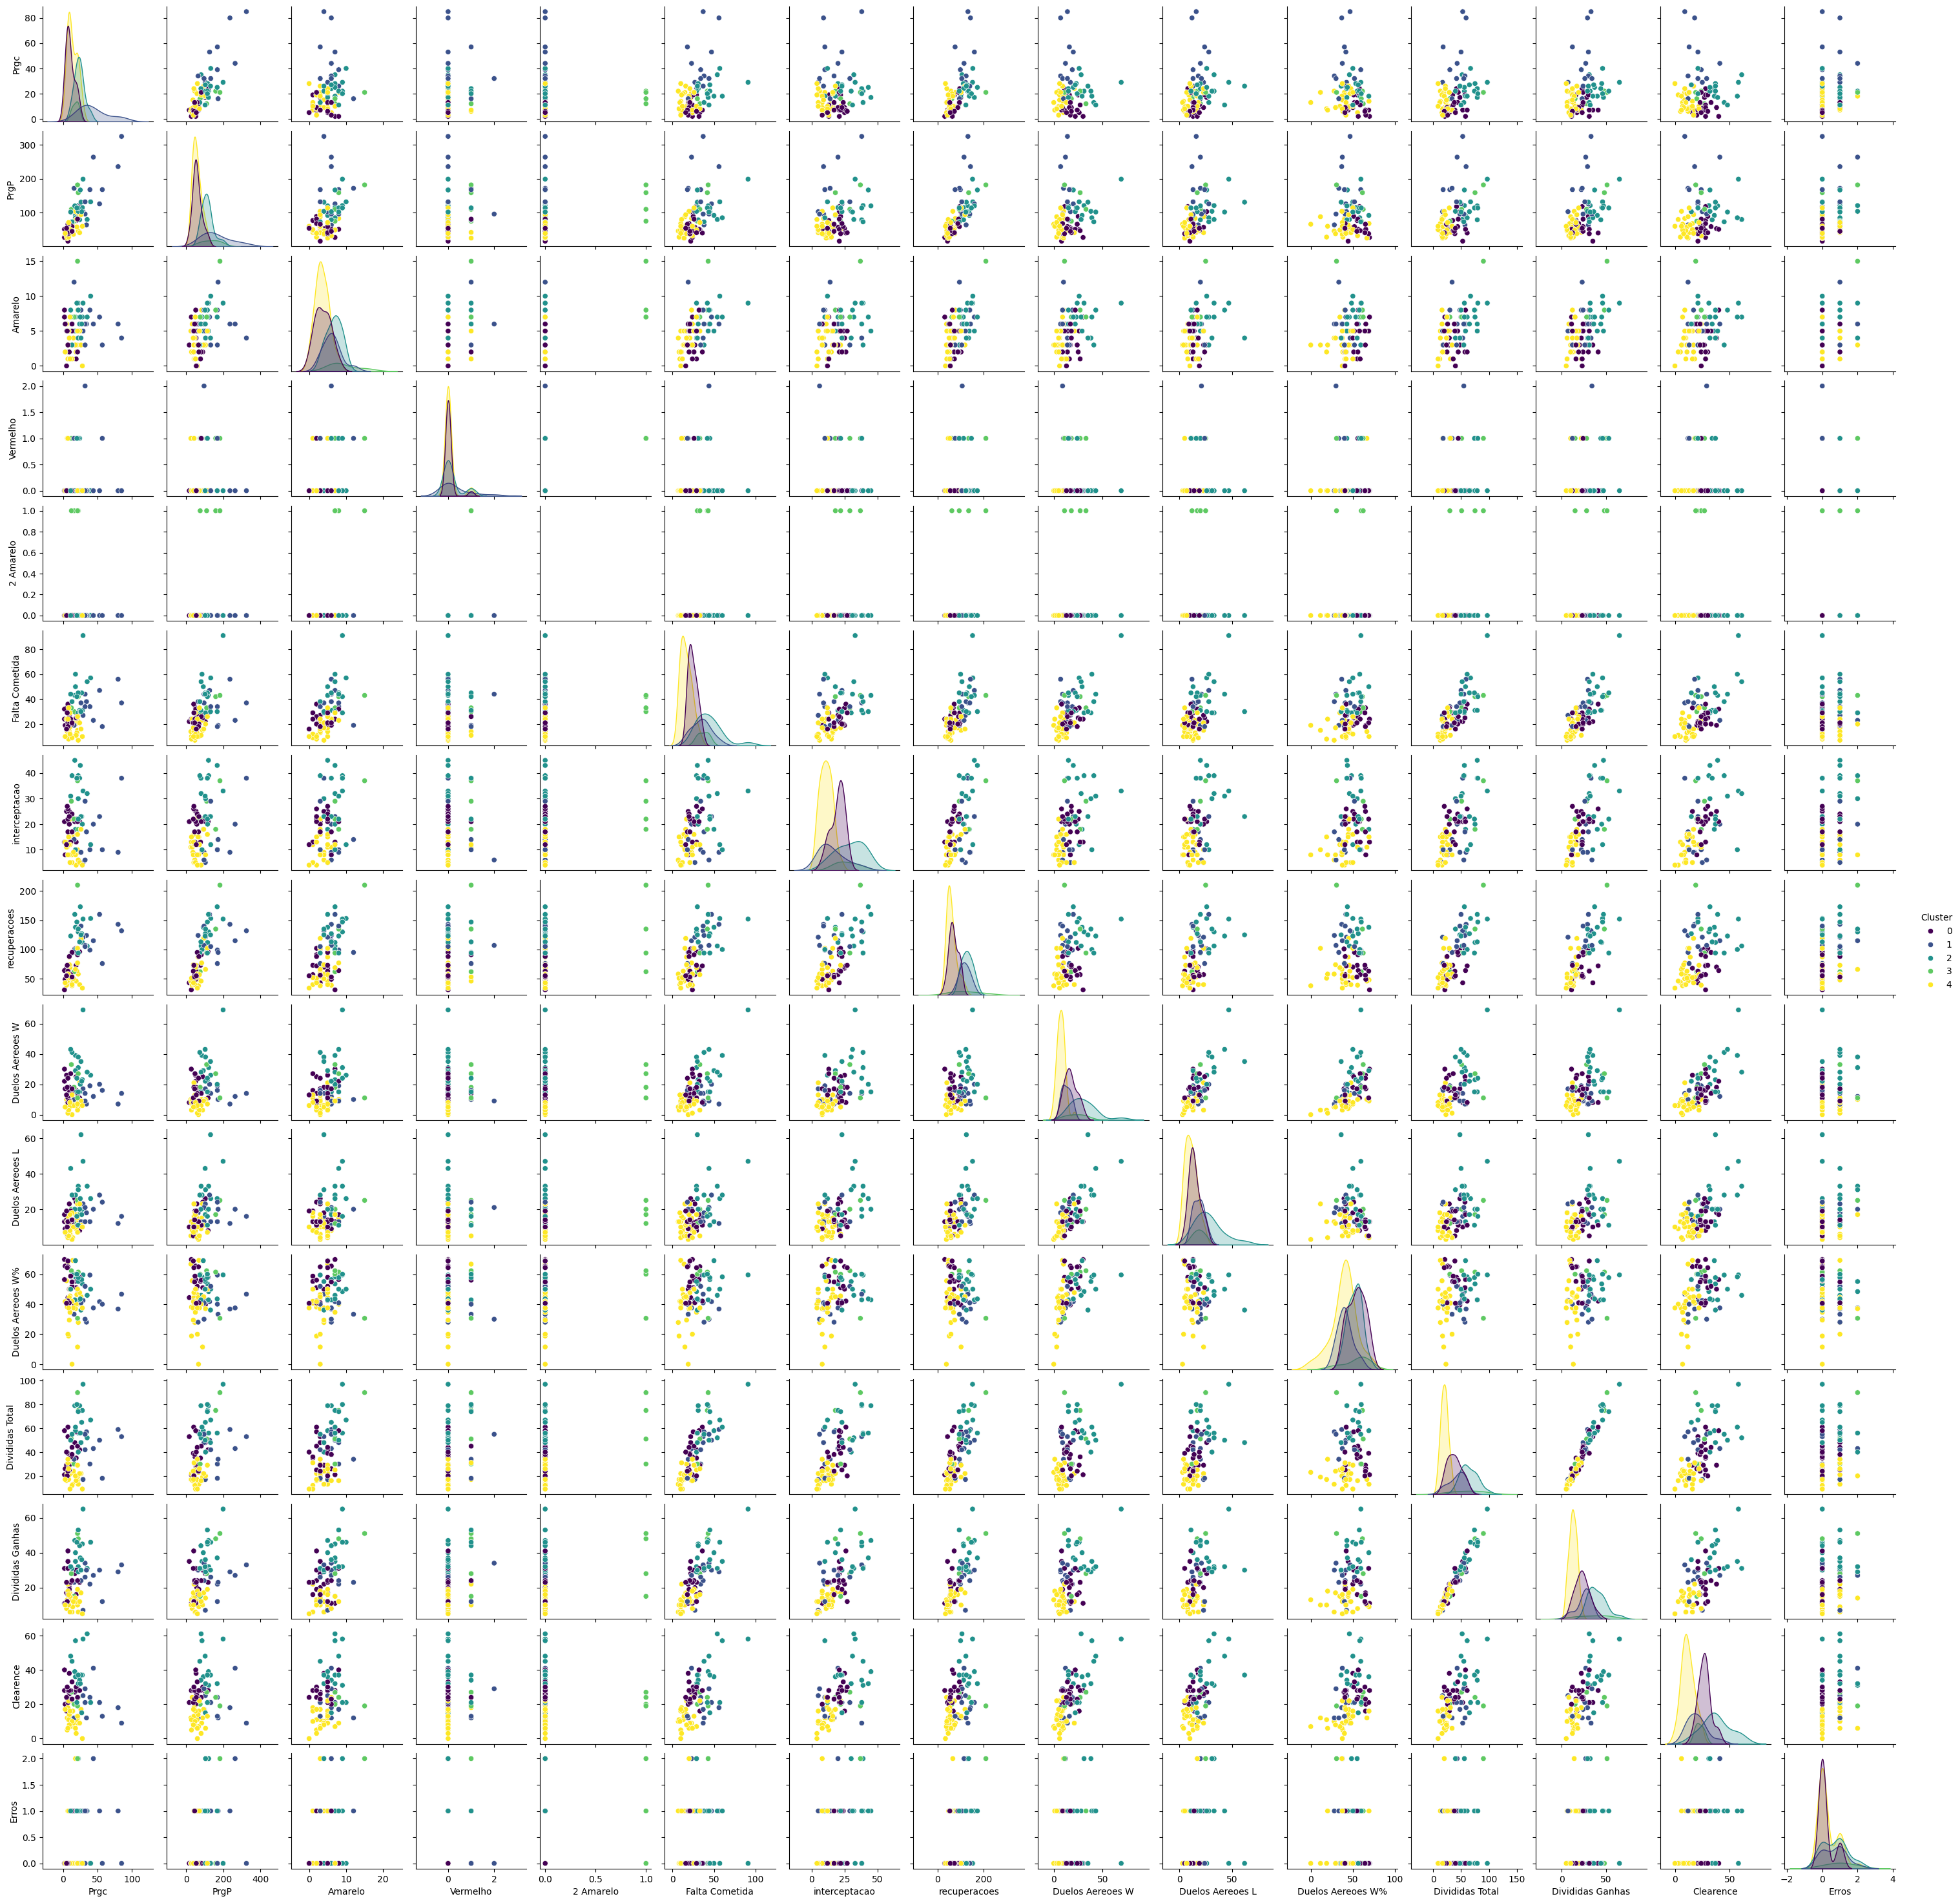

In [23]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Vol[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Análise dos Gráficos e das Correlações no Heatmap**

A análise será feita com foco nos volantes, considerando as métricas apresentadas no heatmap e os padrões observados nos gráficos de dispersão.

---

### **1. Correlação Positiva Alta:**
1. **Minutos vs Recuperações (0.87):**
   - Jogadores que permanecem mais tempo em campo tendem a ter mais recuperações. Isso é esperado para volantes, cuja função principal é recuperar a posse de bola.

2. **Interceptações vs Recuperações (0.79):**
   - Forte correlação sugere que volantes que interceptam jogadas adversárias também se destacam nas recuperações, mostrando leitura de jogo avançada.

3. **Duelos Aéreos W vs Total de Divididas Ganhas (0.74):**
   - Jogadores com maior sucesso em duelos aéreos geralmente também dominam as divididas, indicando boa performance em disputas corpo a corpo.

4. **Faltas Cometidas vs Minutos (0.69):**
   - Volantes com mais tempo em campo tendem a cometer mais faltas, reflexo de maior exposição defensiva.

---

### **2. Correlação Negativa Alta:**
1. **Duelos Aéreos W% vs Duelos Aéreos L (-0.61):**
   - A eficiência nos duelos aéreos é inversamente proporcional ao número de duelos perdidos, destacando a importância de habilidade técnica nos volantes.

2. **Erros vs Recuperações (-0.36):**
   - Volantes que cometem menos erros são mais confiáveis e eficazes na recuperação da posse.

---

### **3. Correlação Fraca ou Irrelevante:**
1. **Idade vs Minutos (-0.09):**
   - Não há uma relação forte entre a idade do jogador e o tempo em campo, indicando que outros fatores (como performance e estratégia) são mais determinantes.

2. **Cartões Amarelos vs Recuperações (0.15):**
   - Apenas uma relação fraca entre agressividade defensiva (cartões) e sucesso em recuperar bolas.

---

### **Observações dos Gráficos de Dispersão:**
1. **Minutos vs PrgP (Progressão de Passes):**
   - Gráficos mostram que jogadores que permanecem mais tempo em campo tendem a contribuir mais com passes progressivos.
   - Isso indica que volantes box-to-box, com funções ofensivas e defensivas, são mais proeminentes em tempo de jogo.

2. **Duelos Aéreos W% vs Divididas Ganhas:**
   - Uma relação linear é visível nos gráficos, indicando que jogadores dominantes no jogo aéreo também são eficazes em duelos terrestres, uma característica importante para volantes defensivos.

3. **Interceptações vs Faltas Cometidas:**
   - Embora o gráfico mostre certa dispersão, volantes com alta capacidade de interceptação tendem a cometer menos faltas, evidenciando leitura de jogo superior.

4. **Recuperações vs Divididas Ganhas:**
   - Alta densidade no gráfico confirma que volantes que ganham mais divididas também se destacam em recuperações.

5. **Cartões Amarelos vs Minutos:**
   - O aumento de cartões amarelos acompanha o tempo em campo, especialmente para volantes mais agressivos.

---

### **Resumo Geral:**
- **Clusters como Referência:** A análise das correlações reforça os perfis traçados nos clusters. Volantes completos (Cluster 1) se destacam tanto defensivamente quanto ofensivamente, enquanto volantes defensivos (Cluster 2) dominam em interceptações, recuperações e duelos aéreos.
- **Métricas-chaves para Volantes:**
  - Recuperações e interceptações são os principais indicadores de eficiência defensiva.
  - PrgP e minutos jogados refletem a importância ofensiva e regularidade.
  - Eficiência em duelos aéreos (W%) diferencia jogadores com habilidades físicas superiores.
- **Correlação Prática:** Combinações como minutos vs recuperações e interceptações vs recuperações ajudam a identificar jogadores consistentes e impactantes na função de volante.

---
---


### **Cluster 0 (Volantes Posicionais)**
- **Perfil:** Jogadores jovens (25.95 anos) que atuam de forma moderada em minutos jogados (1288) e se destacam em **interceptações** (19.6) e **recuperações** (69.3).
- **Estilo de Jogo:** Volantes posicionais com alta eficiência em **duelos aéreos (54.2%)**, protegendo bem a defesa.
- **Função Principal:** Foco em ações defensivas diretas e controle aéreo.

---

### **Cluster 1 (Volantes Completos e Experientes)**
- **Perfil:** Jogadores mais velhos (29 anos) e altamente participativos (2252 minutos).
- **Métricas-chave:**
  - Alta progressão ofensiva de passes (**PrgP: 162.5**) e muitas **recuperações (118)**.
  - Relativamente equilibrados em ações defensivas e ofensivas.
- **Estilo de Jogo:** Volantes box-to-box, contribuindo tanto na criação de jogadas quanto na defesa.
- **Função Principal:** São pilares no meio-campo, auxiliando na construção ofensiva e recuperação de bola.

---

### **Cluster 2 (Volantes Defensivos Físicos)**
- **Perfil:** Idade média (25.94 anos), jogam bastante (2229 minutos) e possuem desempenho elevado em ações defensivas.
- **Métricas-chave:**
  - Alto número de **duelos ganhos (39.94)** e bom aproveitamento aéreo (**52.2%**).
  - Destaque em **interceptações (29.17)** e **recuperações (132.35)**.
- **Estilo de Jogo:** Especialistas em desarmes e proteção da defesa.
- **Função Principal:** Volantes com forte presença física e dominância defensiva, provavelmente com pouco envolvimento ofensivo.

---

### **Cluster 3 (Volantes Agressivos e Ofensivos)**
- **Perfil:** Jogadores experientes (28.75 anos), jogam bastante (2134 minutos) e possuem alta contribuição ofensiva.
- **Métricas-chave:**
  - Alta **progressão de passes (131.5)**, combinada com ações defensivas sólidas.
  - Muitas faltas cometidas e cartões amarelos (9.25), indicando estilo mais agressivo.
- **Estilo de Jogo:** Volantes que iniciam jogadas ofensivas e se arriscam em confrontos físicos.
- **Função Principal:** Apoiadores ofensivos que também contribuem defensivamente, mas com maior risco de penalidades.

---

### **Cluster 4 (Volantes Reservas ou de Baixa Atuação)**
- **Perfil:** Jogadores menos utilizados (1005 minutos), com impacto reduzido em campo.
- **Métricas-chave:**
  - Baixo número de **recuperações (60.1)** e **interceptações (10.9)**.
  - Pouca eficiência em duelos aéreos (**39.2%**).
- **Estilo de Jogo:** Reservas ou jogadores em transição para maior protagonismo.
- **Função Principal:** Possuem papel de suporte, com menor relevância nas partidas.

---






In [24]:
cluster_names = {
    0: 'volante equilibrado',
    1: 'volante criativo',
    2: 'volante defensivos',
    3: 'volante ofensivo',
    4: 'volante reserva',
}

# Adicionar nomes ao DataFrame
Vol['Perfil'] = Vol['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Vol[['jogador','time','posicao','idade', 'Minutos', 'Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros','Perfil']].head())

             jogador            time posicao  idade  Minutos  Prgc  PrgP  \
8        Fernandinho  Ath Paranaense      MF     38     1551    39   168   
10         Filipinho  Ath Paranaense      MF     22      923     7    16   
11           Gabriel  Ath Paranaense      MF     31     1431    17   103   
41  Gabriel Baralhas  Atl Goianiense      MF     25     2452    22   121   
43   Gonzalo Freitas  Atl Goianiense      MF     32      820     2    27   

    Amarelo  Vermelho  2 Amarelo  ...  interceptacao  recuperacoes  \
8         8         0          0  ...             10            99   
10        3         0          0  ...             21            43   
11        3         0          0  ...             21           101   
41        9         0          0  ...             39           130   
43        7         0          0  ...             13            31   

    Duelos Aereoes W  Duelos Aereoes L  Duelos Aereoes W%  Divididas Total  \
8                 19                13      

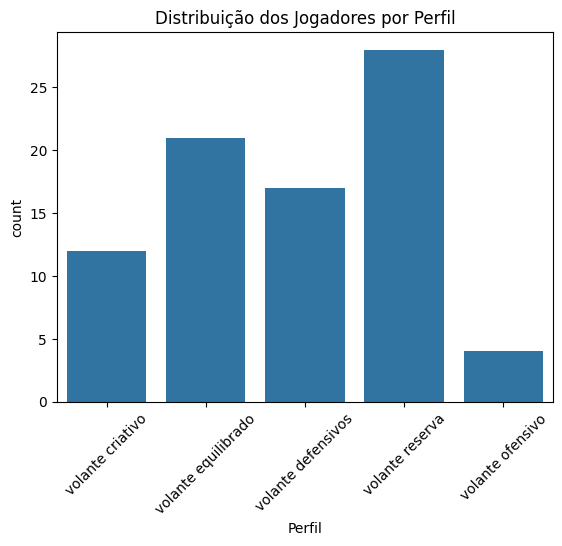

In [25]:
sns.countplot(data=Vol, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [26]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Vol[Vol['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros','Perfil']])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "volante ofensivo"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: volante ofensivo
          jogador       time posicao  idade  Minutos  Prgc  PrgP  Amarelo  Vermelho  2 Amarelo  Falta Cometida  interceptacao  recuperacoes  Duelos Aereoes W  Duelos Aereoes L  Duelos Aereoes W%  Divididas Total  Divididas Ganhas  Clearence  Erros            Perfil
270  Lucas Romero   Cruzeiro      MF     29     2531    22   159        8         1          1              42             18           135                27                17               61.4               75                48         24      0  volante ofensivo
325         Allan   Flamengo      MF     26     1412    16    75        7         1          1              30             22            62                18                12               60.0               30                15         20      1  volante ofensivo
333  Erick Pulgar   Flamengo      MF     30     1750    12   110        7         1          1              33             29            94                33      

In [27]:
# Dicionário dos peso para cada métrica
pesos = {
    'Amarelo': -5,
    'Vermelho': -10,
    'Falta Cometida' : -2,
    'interceptacao': 2,
    'recuperacoes': 2,
    'Duelos Aereoes W': 4,
    'Divididas Ganhas': 6,
    'Clearence': 5,
    'Erros' : 1,

}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Vol[coluna + '_Pontuacao'] = Vol[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Vol['Pontuacao_Total'] = Vol[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Vol['Pontuacao_Total'].min()
max_pontuacao = Vol['Pontuacao_Total'].max()
Vol['Pontuacao'] = (
    (Vol['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'volante defensivos'
jogadores_filtrados = Vol[Vol['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: volante defensivos
 Ranking                time posicao            jogador             Perfil  Pontuacao
       1       Botafogo (RJ)      MF            Gregore volante defensivos      100.0
       2              Grêmio      MF Mathías Villasanti volante defensivos  73.508595
       3           Palmeiras      MF      Aníbal Moreno volante defensivos  69.767442
       4             Vitória      MF            Willian volante defensivos  68.250758
       5       Internacional      MF             Romulo volante defensivos  64.812942
       6       Internacional      MF        Thiago Maia volante defensivos  63.700708
       7            Criciúma      MF             Newton volante defensivos  63.397371
       8            Criciúma      MF            Barreto volante defensivos    61.9818
       9 Red Bull Bragantino      MF  Lucas Evangelista volante defensivos  61.779575
      10              Cuiabá      MF      Lucas Mineiro volante defensivos  61.375126
  

In [28]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'volante defensivos'  # Defina o perfil desejado
jogadores_filtrados = Vol[Vol['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))
6

Jogadores disponíveis no perfil 'volante defensivos': ['Gabriel Baralhas', 'Rhaldney', 'Gregore', 'Barreto', 'Newton', 'Fernando Sobral', 'Lucas Mineiro', 'Dodi', 'Mathías Villasanti', 'Romulo', 'Thiago Maia', 'Aníbal Moreno', 'Richard Ríos', 'Lucas Evangelista', 'Hugo Moura', 'Mateus Cocão', 'Willian']
Digite o nome do jogador (ou 'sair' para finalizar): Gregore
Insira o valor de mercado para Gregore (€M): 7
Digite o nome do jogador (ou 'sair' para finalizar): Mathías Villasanti
Insira o valor de mercado para Mathías Villasanti (€M): 6
Digite o nome do jogador (ou 'sair' para finalizar): Aníbal Moreno
Insira o valor de mercado para Aníbal Moreno (€M): 5
Digite o nome do jogador (ou 'sair' para finalizar): sair

Ranking de jogadores por eficiência de valor:
 Ranking            jogador  Valor de Mercado (€M)  Pontuacao  Custo por Ponto (€M)  Score de Valor
       1            Gregore                    7.0      100.0                  0.07       14.285714
       2      Aníbal Moreno     


Jogadores selecionados: Caio Alexandre, Gregore, Allan, Mathías Villasanti, Aníbal Moreno
                jogador           time posicao  idade  Minutos  Prgc  PrgP  Amarelo  Vermelho  2 Amarelo  Falta Cometida  interceptacao  recuperacoes  Duelos Aereoes W  Duelos Aereoes L  Duelos Aereoes W%  Divididas Total  Divididas Ganhas  Clearence  Erros
110      Caio Alexandre          Bahia      MF     24     2774    80   236        6         0          0              56              9           143                 7                12               36.8               59                29         18      1
151             Gregore  Botafogo (RJ)      MF     29     2220    29   199        9         0          0              91             33           152                69                47               59.5               97                65         58      0
325               Allan       Flamengo      MF     26     1412    16    75        7         1          1              30             22

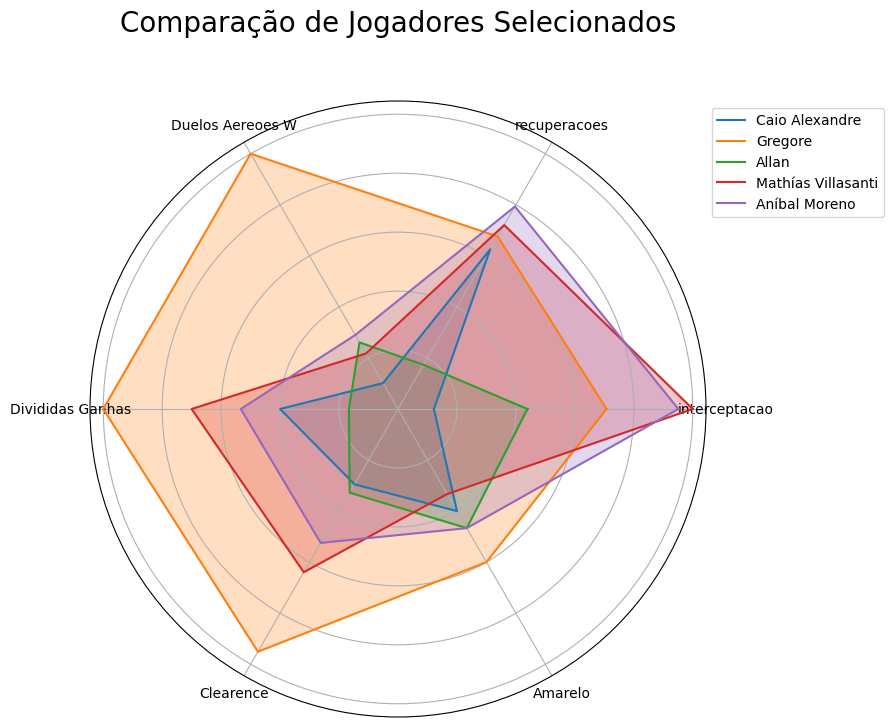

In [29]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['interceptacao','recuperacoes','Duelos Aereoes W','Divididas Ganhas','Clearence','Amarelo']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Gregore','Mathías Villasanti','Aníbal Moreno','Caio Alexandre','Allan']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Vol)